<a href="https://colab.research.google.com/github/VPivato/Algoritmos-Bioinspirados/blob/main/selecao_clonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

numero = [0,0,0,0,0,0,0,0,0,0,0,
          0,0,0,0,1,1,1,0,0,0,0,
          0,0,0,1,0,0,0,1,0,0,0,
          0,0,0,1,0,0,0,1,0,0,0,
          0,0,0,1,0,0,0,1,0,0,0,
          0,0,0,0,1,1,1,0,0,0,0,
          0,0,0,1,0,0,0,1,0,0,0,
          0,0,0,1,0,0,0,1,0,0,0,
          0,0,0,1,0,0,0,1,0,0,0,
          0,0,0,0,1,1,1,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0,0,]

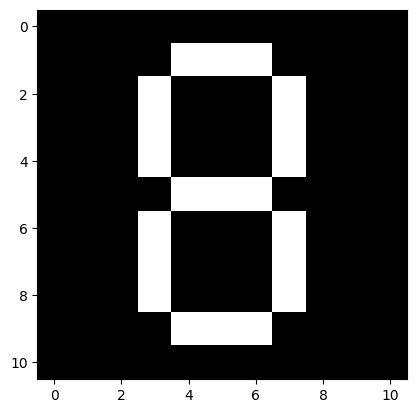

In [ ]:
plt.imshow(np.reshape(numero, (11, 11)), cmap="gray");

# Função de criação de um anticorpo

In [ ]:
# Criação de um anticorpo aleatório, lista com 121 (11x11) posições
def anticorpo():
  posicoes = []
  for i in range(121): # Imagem 11x11
    posicoes.append(random.randint(0, 1))
  return posicoes

# Função de criação da população



In [ ]:
# Criação de uma população de anticorpos com base no paramêtro de quantidade
def populacao(quantidade):
  anticorpos = []
  for i in range(quantidade):
    anticorpos.append(anticorpo())
  return anticorpos

# Função Fitness

In [ ]:
# Retorna o quão similar o anticorpo é do antigeno em uma escala 0-1
def afinidade(anticorpo, antigeno):
  pontos = 0
  for i in range(len(anticorpo)):
    if anticorpo[i] ==  antigeno[i]:
      pontos += 1
  return round(pontos / len(anticorpo), 3) # Tranforma em porcentagem

# Lista afinidade anticorpo-antigeno

In [ ]:
def afinidades_anticorpos(populacao, antigeno):
  afinidades = [(afinidade(i, antigeno), i) for i in populacao]
  return afinidades

# Seleção dos N melhores anticorpos

In [ ]:
def selecao(lista_afinidades, quantos):
  ordenados = sorted(lista_afinidades)
  reverso = ordenados[::-1]
  return reverso[:quantos]

# Clonagem dos melhores anticorpos

In [ ]:
def clonagem(quantidade_clones, melhores, antigeno):
  clones = []
  afinidades = [afinidade for (afinidade, _) in melhores]
  anticorpos = [anticorpo for (_, anticorpo) in melhores]
  soma = sum(afinidades)

  clonagens = [round(c / soma * quantidade_clones) for c in afinidades] # Definição de quantos clones vão ser gerados para cada anticorpo com base em sua afinidade

  for i in range(len(clonagens)):
    for j in range(clonagens[i]):
      dupla = []
      dupla.append(afinidades[i])
      dupla.append(anticorpos[i])
      clones.append(dupla)
  return clones

# Hipermutação dos anticorpos

In [ ]:
def hipermutacao(clones, antigeno, fator=0.1):
  hipermutados = []
  clones = [anticorpo for (_, anticorpo) in clones]
  tamanho_antigeno = len(antigeno)

  for i in clones:
    afin = round(afinidade(i, antigeno) * tamanho_antigeno) # Tranforma de porcentagem para valor 0-121
    taxa_hipmut = ((1 - (afin / tamanho_antigeno)) * fator)
    hipermutado = []

    for j in i: # Percorre todos os genes de um anticorpo
      rand = random.random()
      if rand <= taxa_hipmut:
        hipermutado.append(1 if j == 0 else 0)
      else:
        hipermutado.append(j)
    hipermutados.append(hipermutado)
  return hipermutados

# Algoritmo de seleção clonal

In [ ]:
def selecao_clonal(tamanho_populacao, antigeno, iteracoes=100, taxa_hipermutacao=0.1, quantos_melhores=0.1, mostrar_evolucao=False):
  pop = populacao(tamanho_populacao)

  for i in range(iteracoes):
    num_melhores = math.ceil(len(pop) * quantos_melhores)
    num_clones = len(pop) - num_melhores
    afinidades = afinidades_anticorpos(pop, antigeno)
    sel = selecao(afinidades, num_melhores)
    clon = clonagem(num_clones, sel, antigeno)
    hipermut = hipermutacao(clon, antigeno, fator=taxa_hipermutacao)
    num_novos = len(pop) - len(hipermut) # Quantos anticorpos faltam para a população ter o tamanho máximo

    for _ in range(num_novos):
      hipermut.append(anticorpo())
    pop = hipermut

    if mostrar_evolucao:
      print(f"Geração: {i+1}: {afinidade(pop[0], antigeno):.1%}")
      plt.imshow(np.reshape(pop[0], (11, 11)), cmap="gray")
      plt.title(f"Geração {i+1}: {afinidade(pop[0], antigeno):.1%}")
      plt.axis("off")
      plt.show()
      plt.pause(.1)
      print()

# Execução do algoritmo

Geração: 1: 56.2%


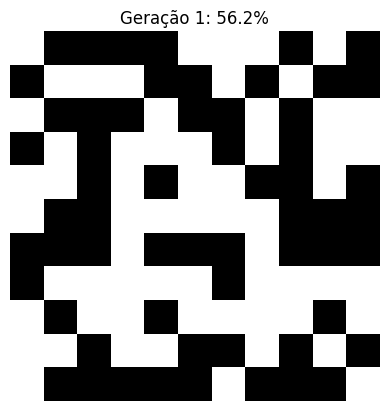


Geração: 2: 59.5%


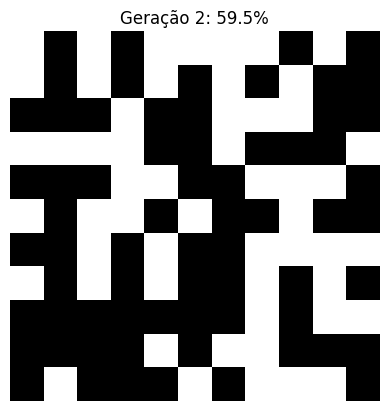


Geração: 3: 58.7%


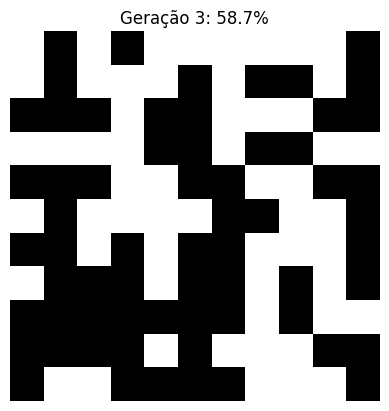


Geração: 4: 62.8%


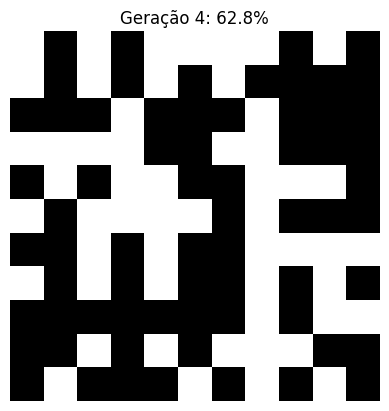


Geração: 5: 66.1%


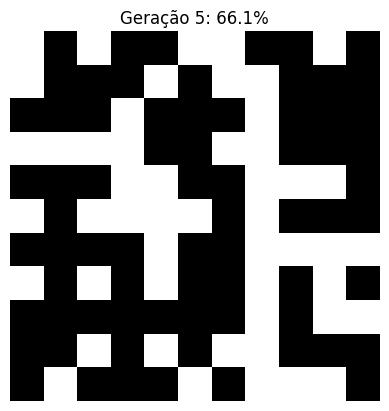


Geração: 6: 66.1%


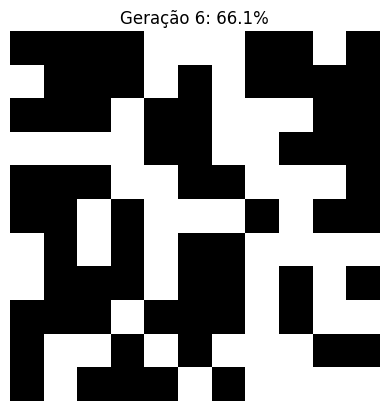


Geração: 7: 64.5%


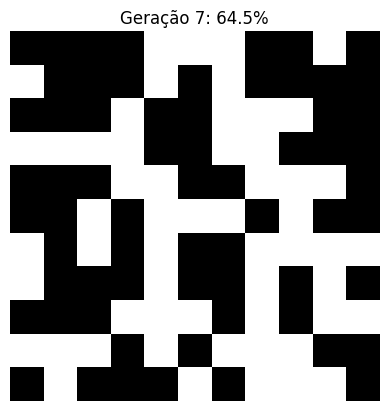


Geração: 8: 67.8%


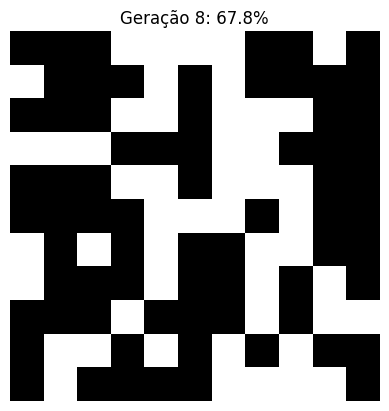


Geração: 9: 69.4%


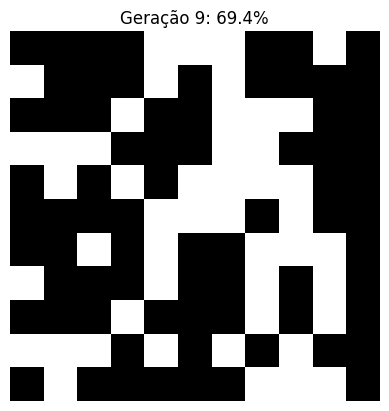


Geração: 10: 71.9%


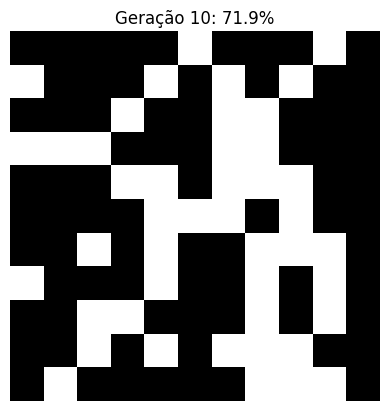


Geração: 11: 74.4%


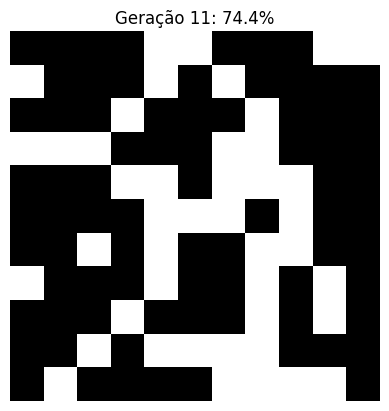


Geração: 12: 74.4%


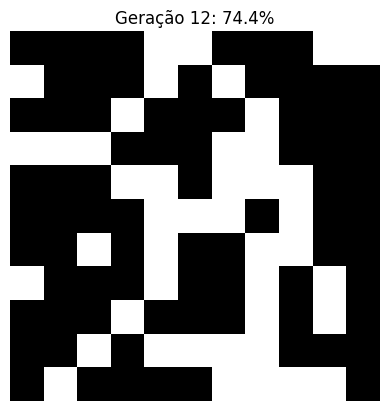


Geração: 13: 73.6%


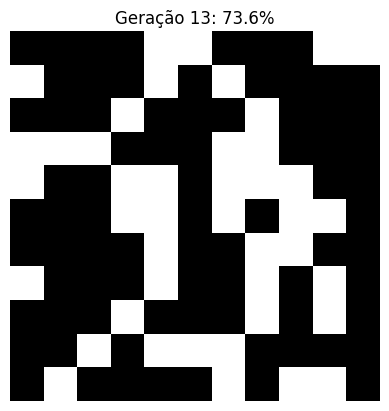


Geração: 14: 72.7%


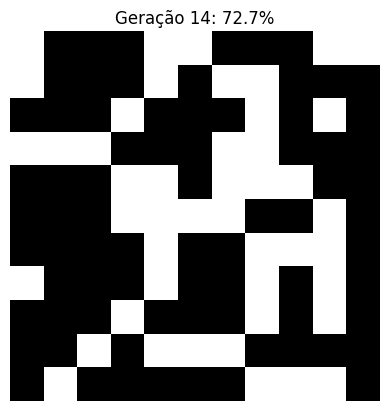


Geração: 15: 74.4%


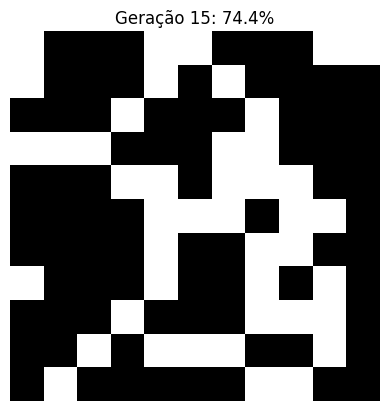


Geração: 16: 74.4%


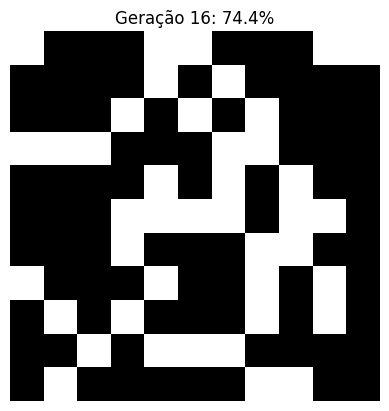


Geração: 17: 76.0%


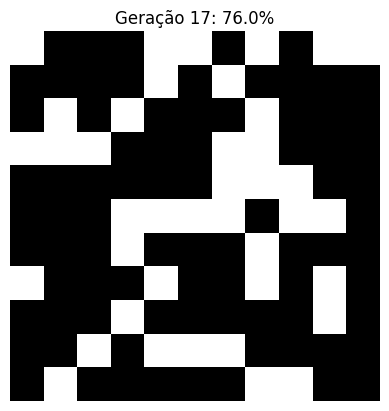


Geração: 18: 78.5%


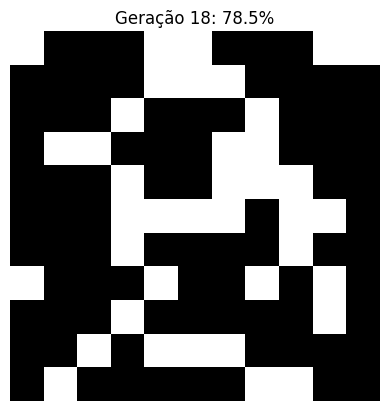


Geração: 19: 78.5%


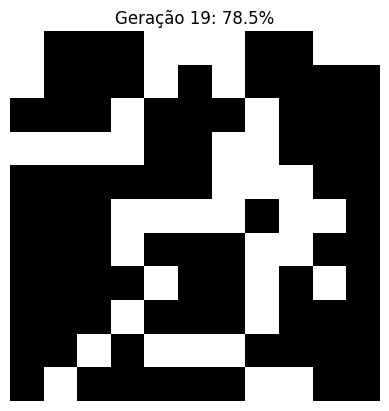


Geração: 20: 73.6%


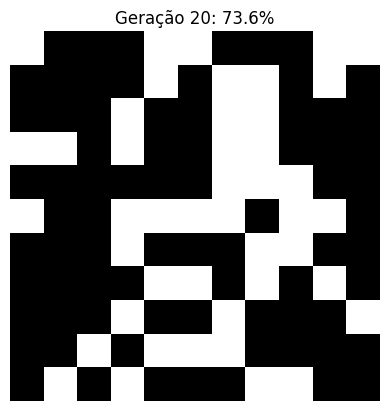


Geração: 21: 83.5%


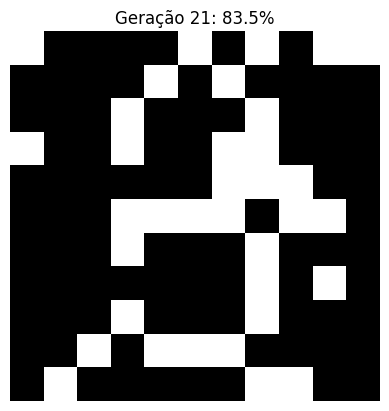


Geração: 22: 81.0%


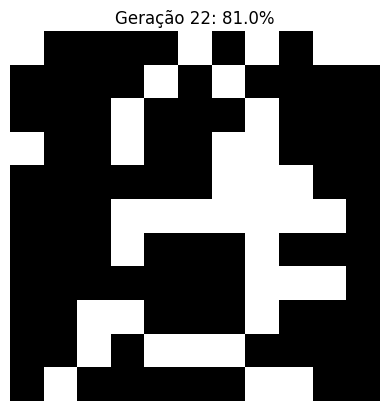


Geração: 23: 82.6%


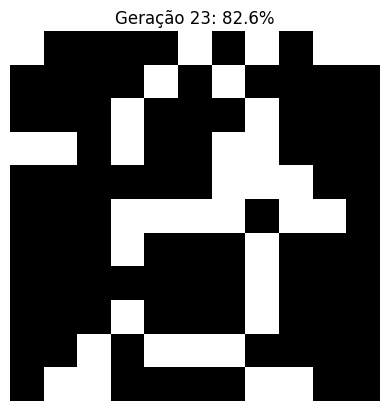


Geração: 24: 81.8%


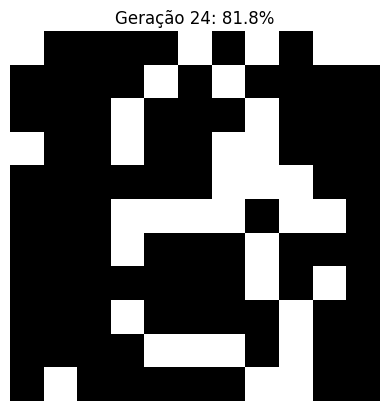


Geração: 25: 85.1%


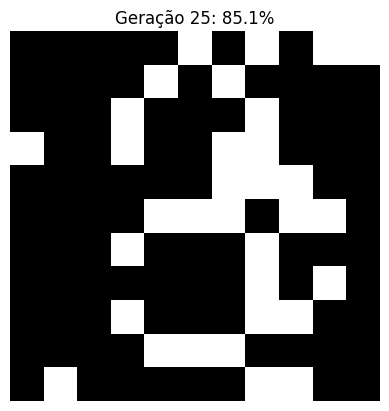


Geração: 26: 83.5%


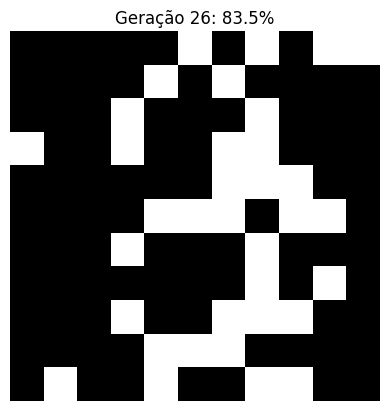


Geração: 27: 84.3%


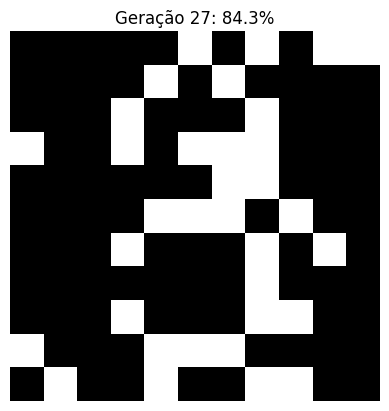


Geração: 28: 84.3%


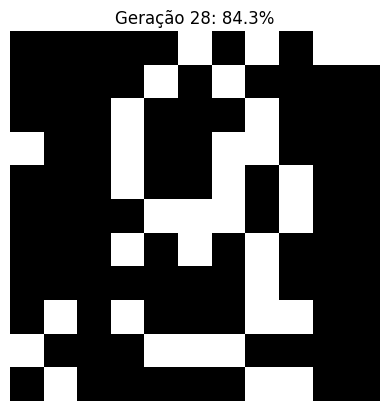


Geração: 29: 86.0%


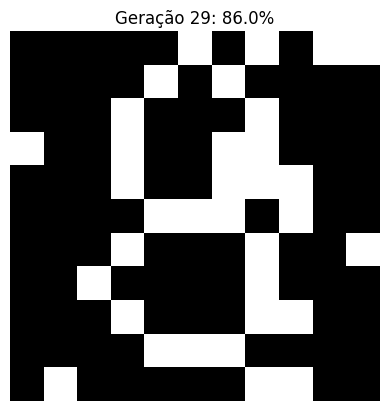


Geração: 30: 87.6%


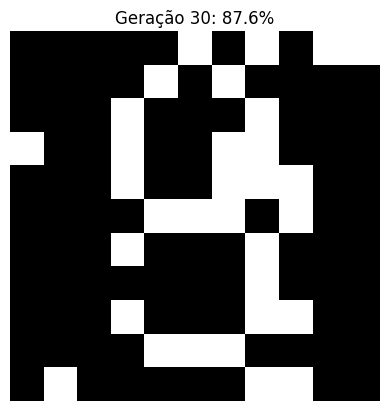


Geração: 31: 86.8%


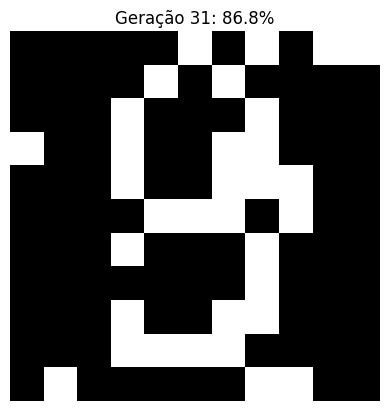


Geração: 32: 89.3%


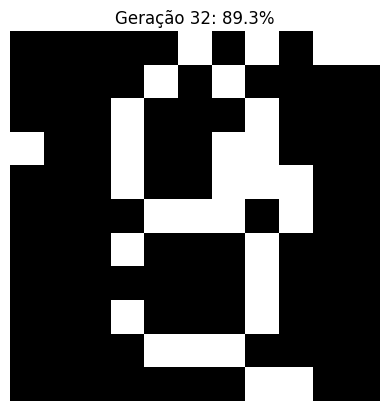


Geração: 33: 90.1%


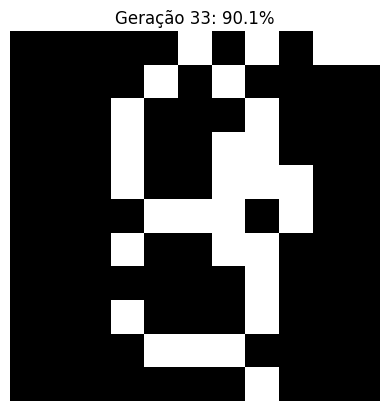


Geração: 34: 87.6%


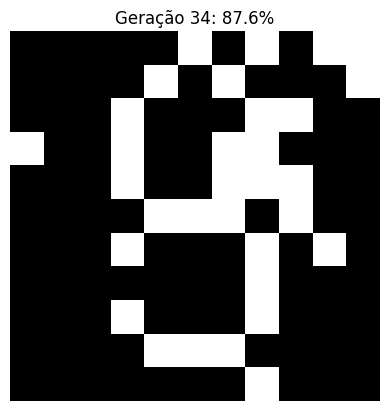


Geração: 35: 90.1%


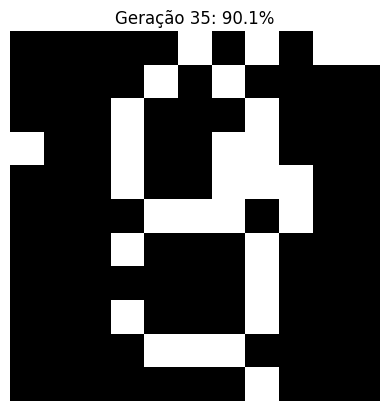


Geração: 36: 91.7%


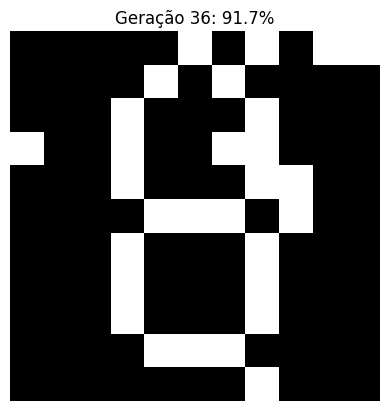


Geração: 37: 91.7%


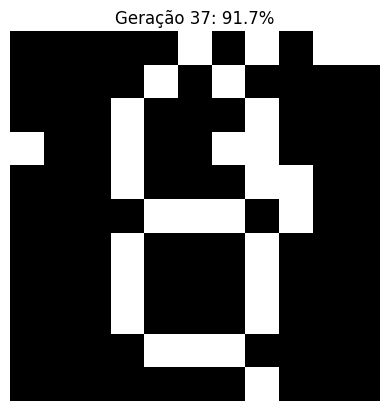


Geração: 38: 91.7%


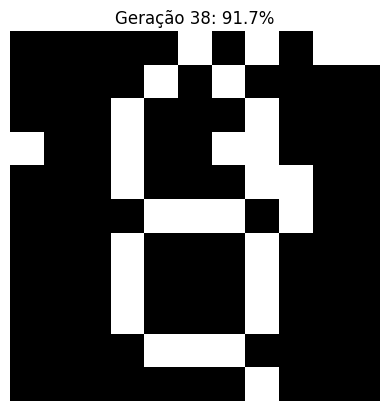


Geração: 39: 90.9%


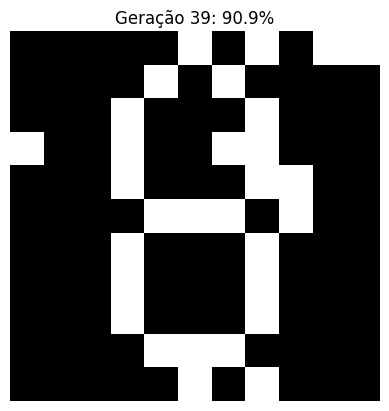


Geração: 40: 92.6%


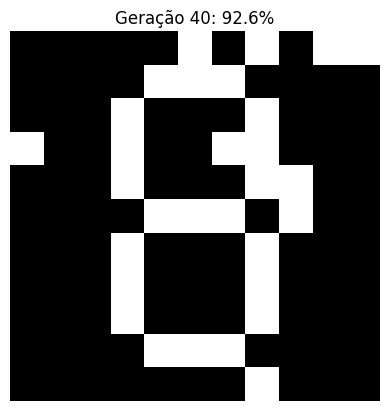


Geração: 41: 92.6%


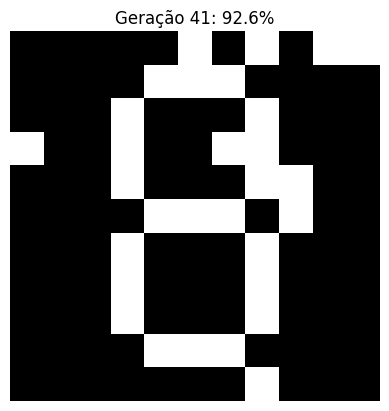


Geração: 42: 92.6%


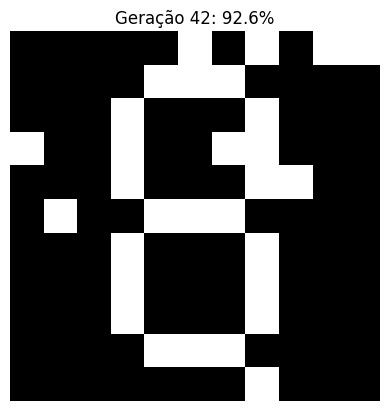


Geração: 43: 90.9%


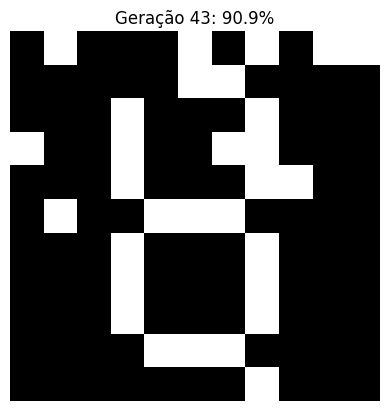


Geração: 44: 92.6%


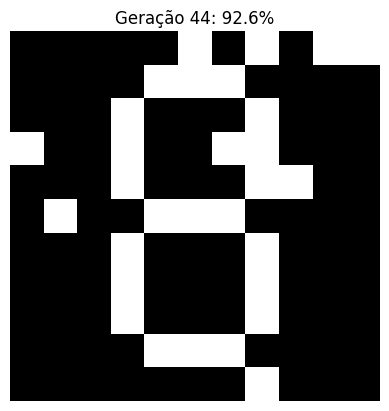


Geração: 45: 92.6%


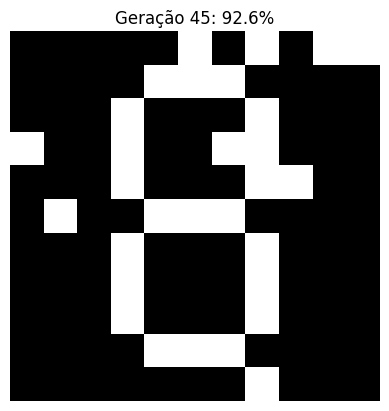


Geração: 46: 90.1%


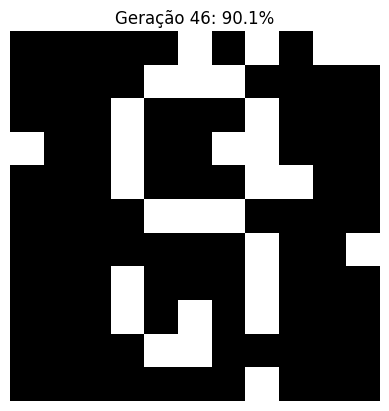


Geração: 47: 93.4%


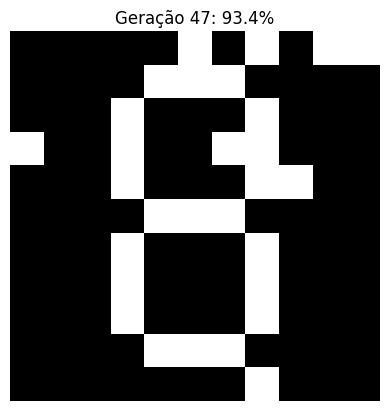


Geração: 48: 91.7%


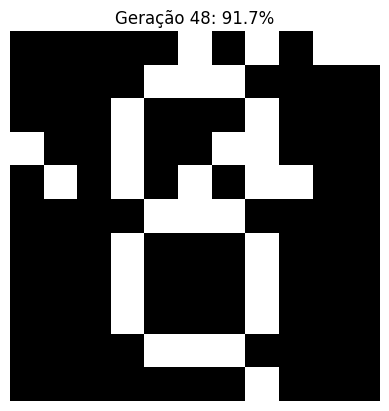


Geração: 49: 93.4%


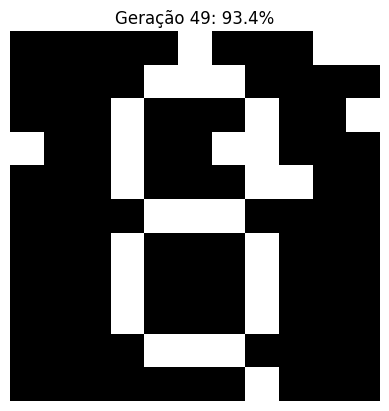


Geração: 50: 94.2%


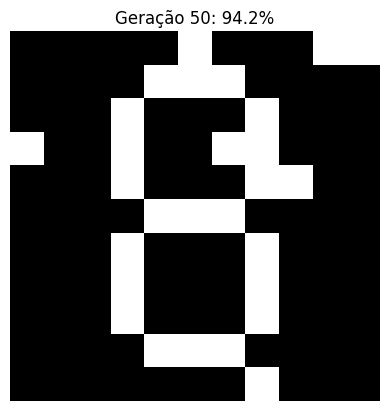


Geração: 51: 95.0%


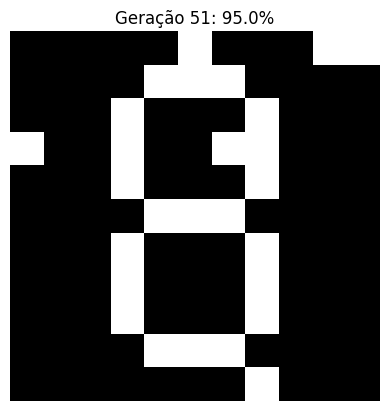


Geração: 52: 95.9%


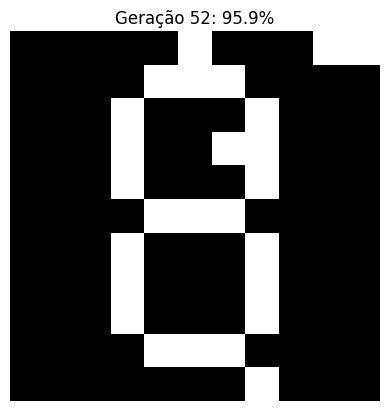


Geração: 53: 94.2%


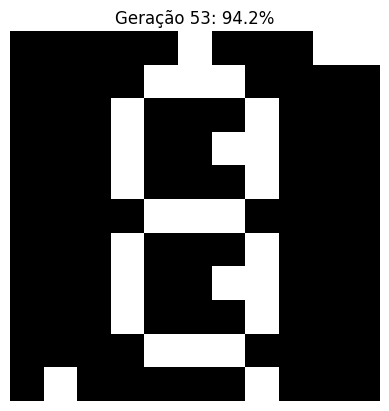


Geração: 54: 94.2%


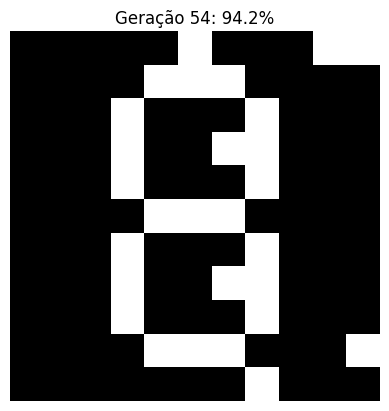


Geração: 55: 95.9%


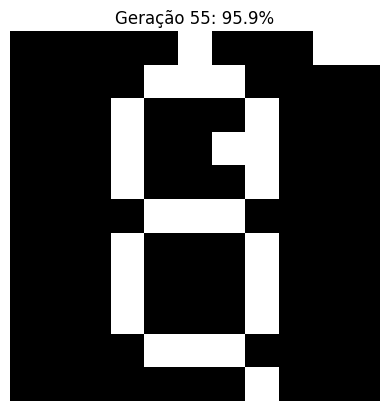


Geração: 56: 95.9%


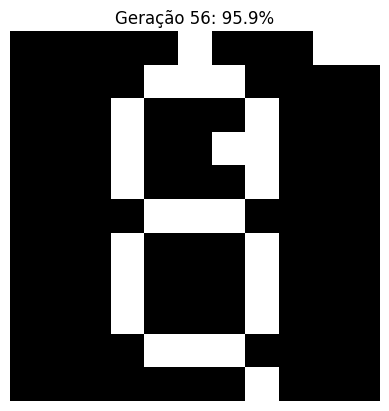


Geração: 57: 95.0%


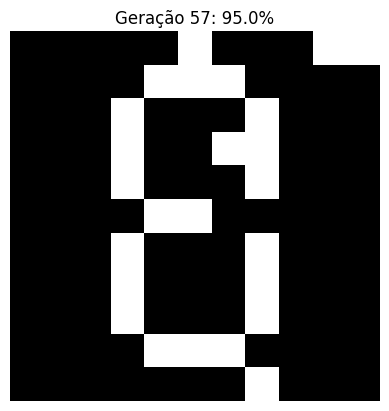


Geração: 58: 95.9%


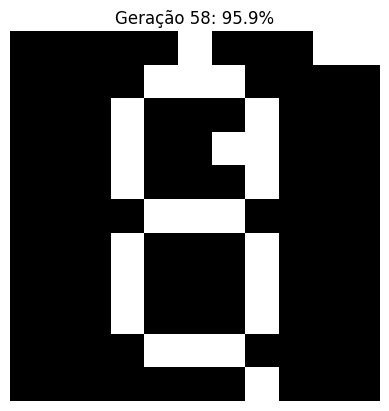


Geração: 59: 95.9%


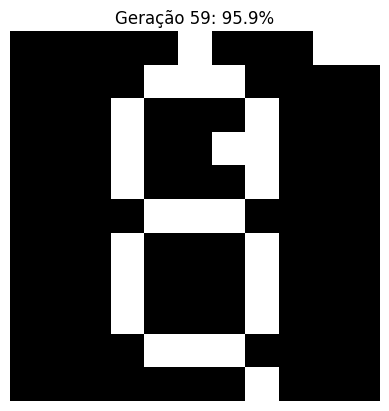


Geração: 60: 95.9%


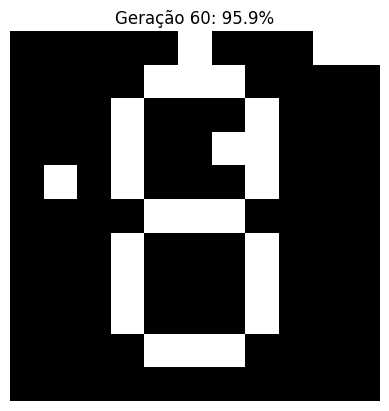


Geração: 61: 95.9%


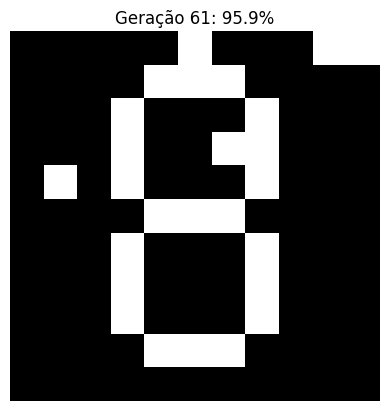


Geração: 62: 95.0%


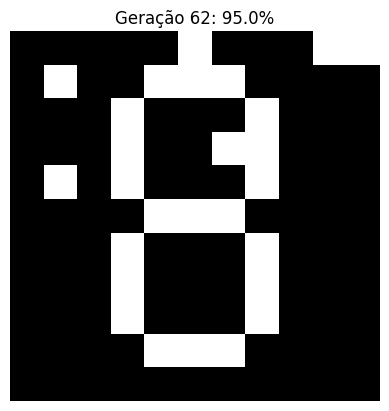


Geração: 63: 95.9%


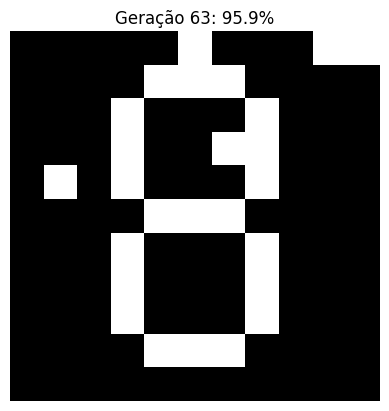


Geração: 64: 95.9%


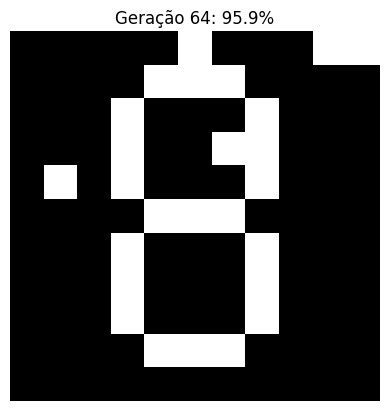


Geração: 65: 95.9%


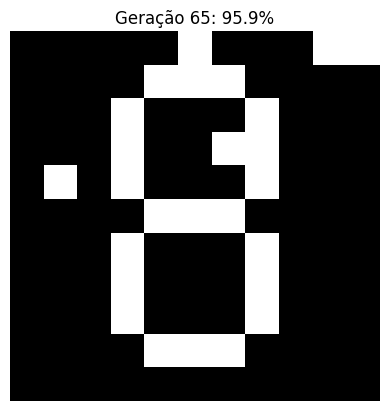


Geração: 66: 95.9%


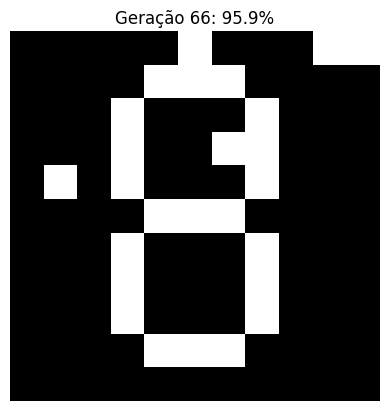


Geração: 67: 95.9%


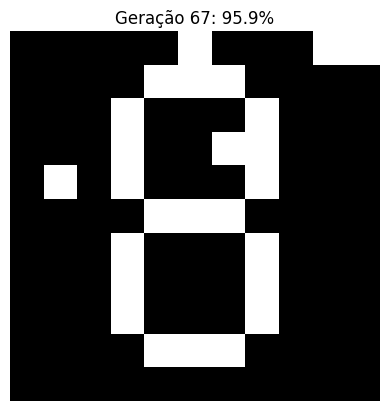


Geração: 68: 95.0%


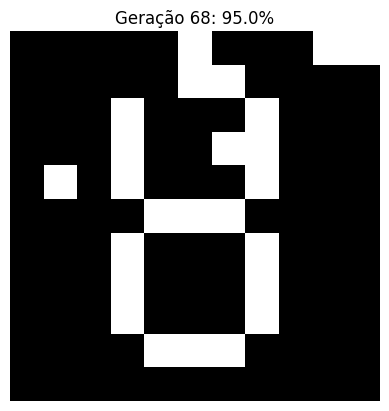


Geração: 69: 95.0%


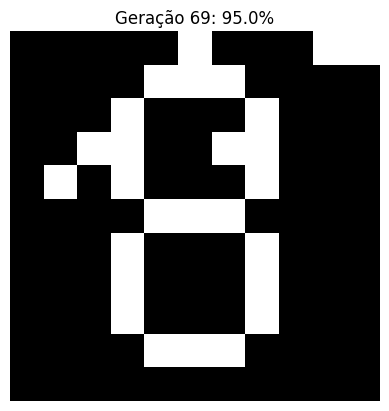


Geração: 70: 95.9%


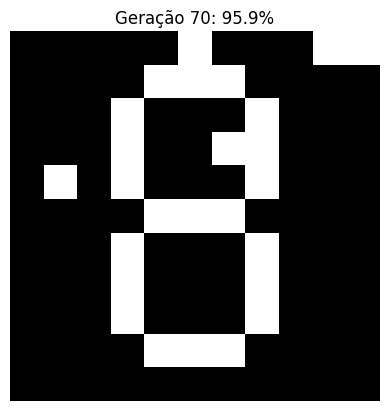


Geração: 71: 96.7%


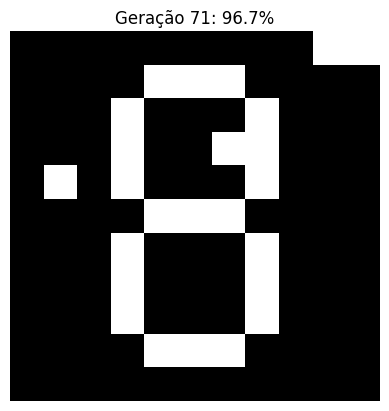


Geração: 72: 96.7%


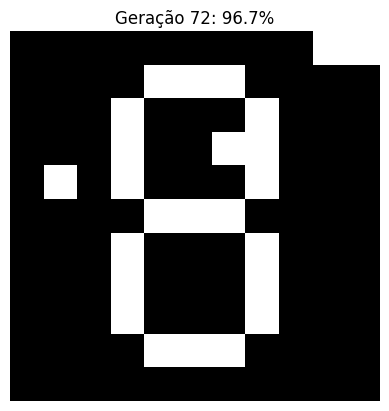


Geração: 73: 96.7%


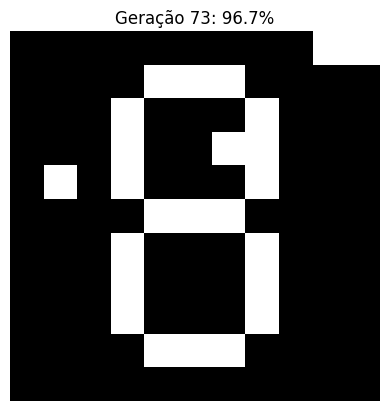


Geração: 74: 95.9%


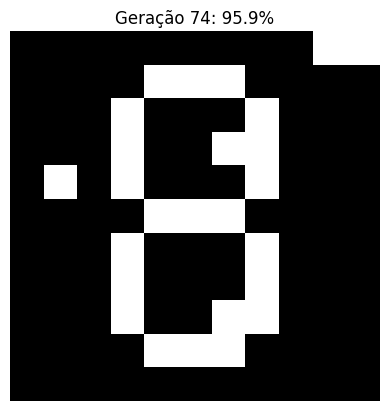


Geração: 75: 96.7%


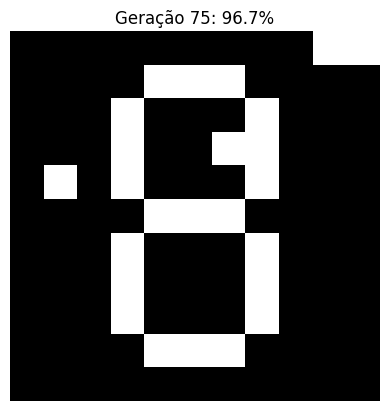


Geração: 76: 95.9%


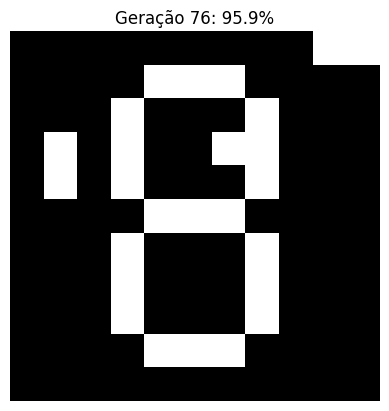


Geração: 77: 95.9%


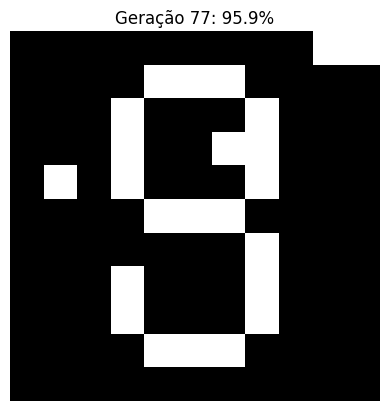


Geração: 78: 97.5%


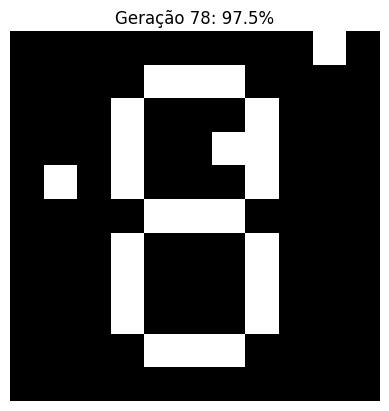


Geração: 79: 97.5%


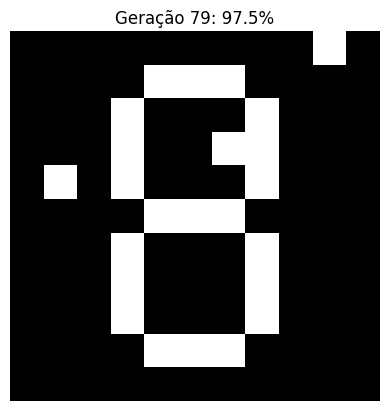


Geração: 80: 97.5%


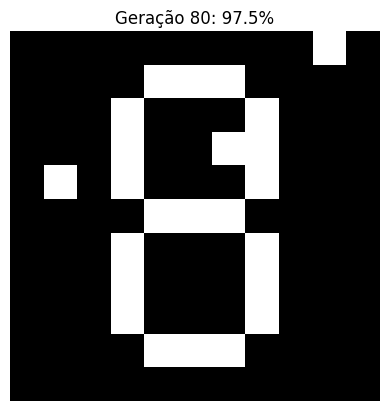


Geração: 81: 97.5%


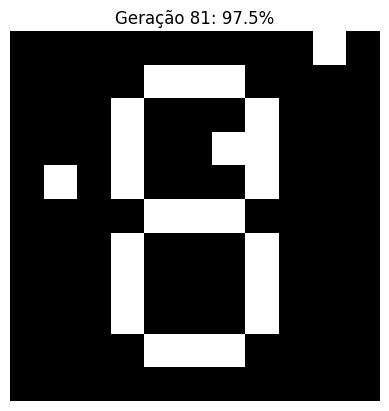


Geração: 82: 97.5%


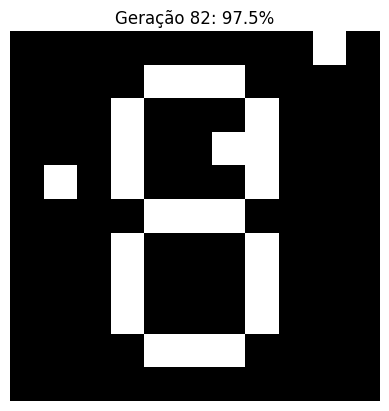


Geração: 83: 96.7%


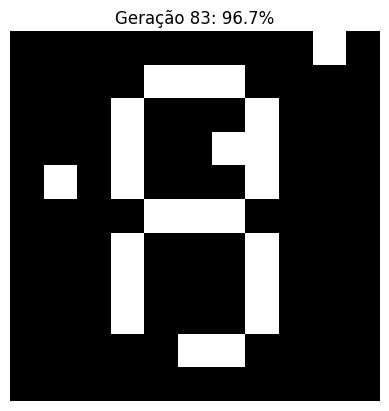


Geração: 84: 97.5%


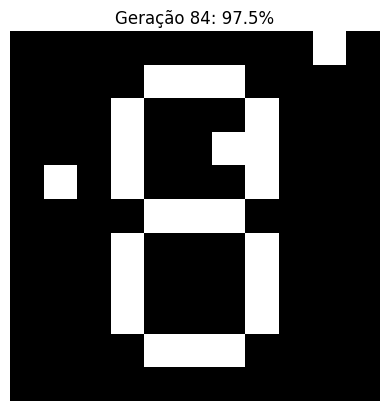


Geração: 85: 98.3%


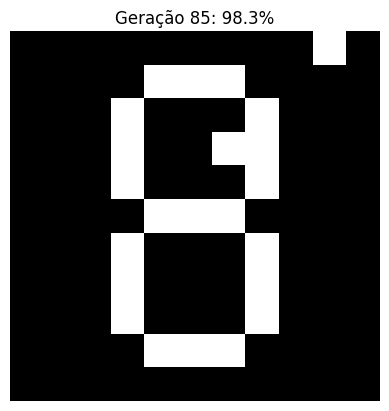


Geração: 86: 98.3%


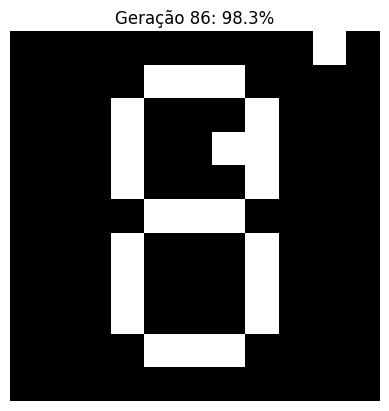


Geração: 87: 98.3%


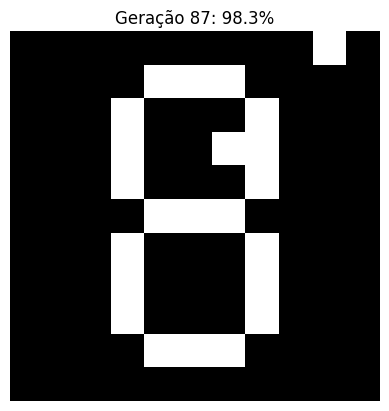


Geração: 88: 98.3%


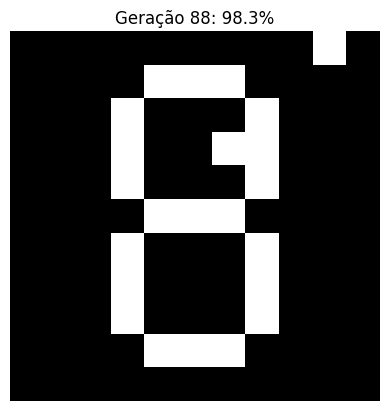


Geração: 89: 98.3%


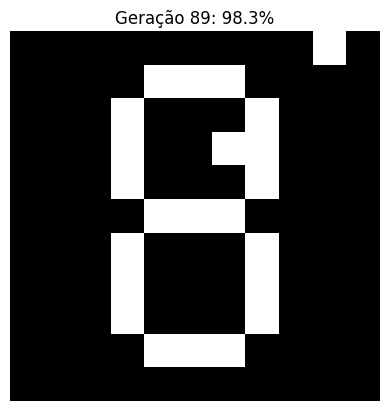


Geração: 90: 98.3%


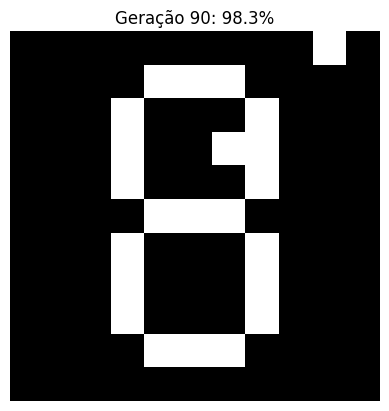


Geração: 91: 98.3%


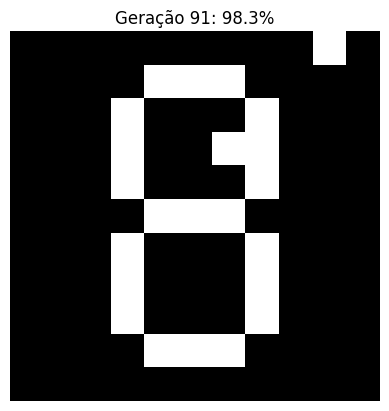


Geração: 92: 97.5%


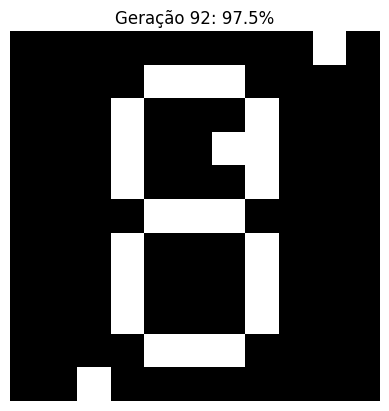


Geração: 93: 98.3%


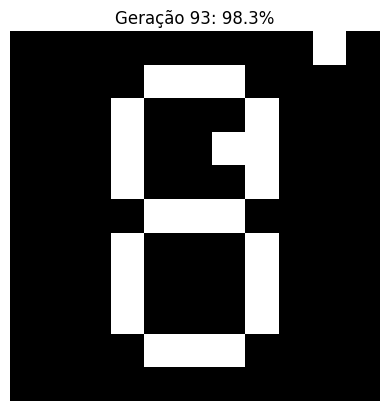


Geração: 94: 98.3%


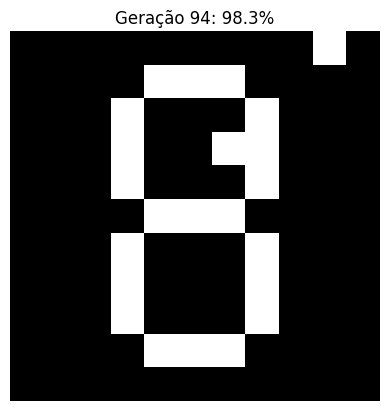


Geração: 95: 96.7%


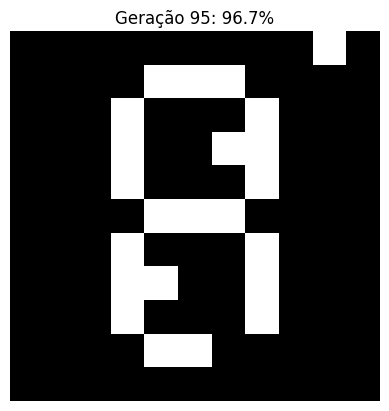


Geração: 96: 98.3%


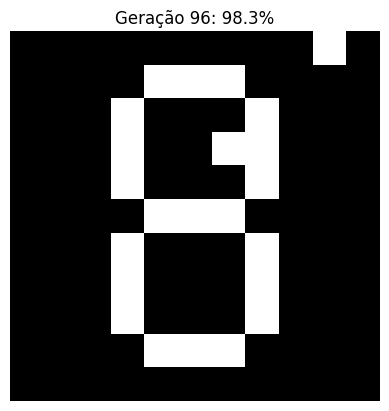


Geração: 97: 98.3%


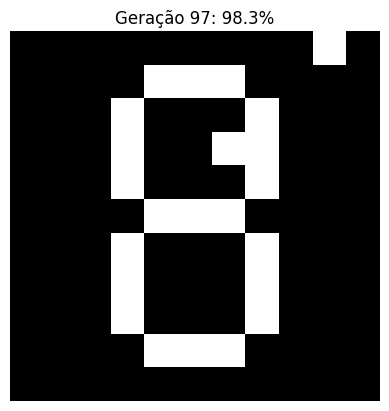


Geração: 98: 98.3%


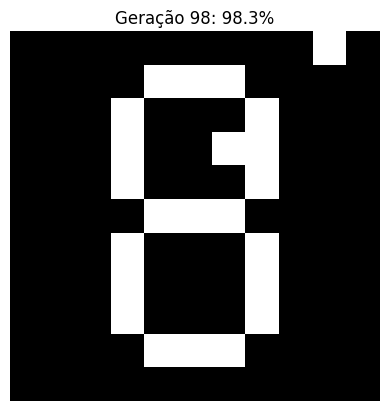


Geração: 99: 98.3%


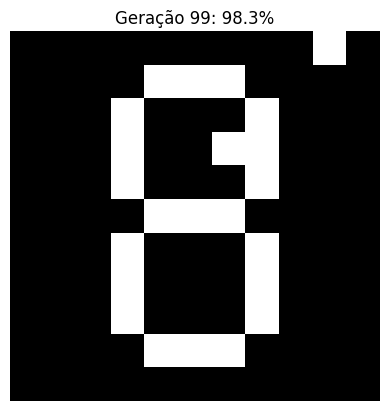


Geração: 100: 98.3%


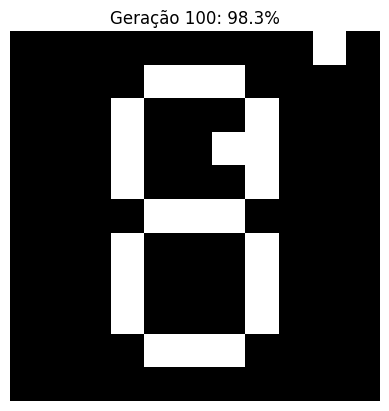

In [ ]:
selecao_clonal(20, numero, mostrar_evolucao=True)